#  Descripción del proyecto

La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con el cliente basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un cliente se haya ido: puede que se vaya de puntillas.

Los indicadores de pérdida varían de un campo a otro. Si un usuario compra en una tienda en línea con poca frecuencia pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor se haya aburrido y te haya abandonado.

En el caso de un gimnasio, tiene sentido decir que un cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Es necesario analizarlos y elaborar una estrategia de retención de clientes.


# Objetivos del proyecto

- Predecir la probabilidad de pérdida (para el próximo mes) para cada cliente
- Elaborar retratos de usuarios típicos: selecciona los grupos más destacados y describe sus características principales
- Analizar los factores que más impactan la pérdida
- Sacar conclusiones básicas y elaborar recomendaciones para mejorar la atención al cliente:
  - Identificar a los grupos objetivo
  - Sugerir medidas para reducir la rotación
  - Describir cualquier otro patrón que observes con respecto a la interacción con los clientes

# Descripción de datos

El dataset `/datasets/gym_churn_us.csv` incluye los siguientes campos:
- `'Churn'` — la cancelación para el mes en cuestión
- Campos de dataset actuales:
  - Datos de usuario del mes anterior
   - `'gender'` - 0 significa femenino, 1 masculino.
   - `'Near_Location'` — si el usuario vive o trabaja en el vecindario donde se encuentra el gimnasio
   - `'Partner'` — si el usuario es un trabajador de una compañía asociada (el gimnasio tiene empresas asociadas cuyos empleados obtienen descuentos; en esos casos el gimnasio almacena información sobre los empleadores de los clientes)
   - `Promo_friends` — si el usuario originalmente se inscribió mediante una oferta "trae a un amigo" (se utilizó el código promocional de un amigo cuando pagaron el primer abono)
   - `'Phone'` — si el usuario aportó el número de teléfono
   - `'Age'`
   - `'Lifetime'` — el tiempo (en meses) desde que el usuario llegó por primera vez al gimnasio
- Datos del registro de visitas y compras y datos sobre el estado actual de la membresía
  - `'Contract_period'` — 1 mes, 3 meses, 6 meses o 1 año
  - `'Month_to_end_contract'` — los meses que faltan hasta que expire el contrato
  - `'Group_visits'` — si el usuario participa en sesiones grupales
  - `'Avg_class_frequency_total'` — frecuencia media de visitas por semana a lo largo de la vida del cliente
  - `'Avg_class_frequency_current_month'` — frecuencia media de visitas por semana durante el mes en curso
  - `'Avg_additional_charges_total'` — cantidad total de dinero gastado en otros servicios del gimnasio: cafetería, productos deportivos, cosméticos, masajes, etc.

# Pasos a seguir

1. **Descargar los datos**

Model Fitness te aportó archivos CSV que contenían los datos sobre cancelación de un mes en concreto e información del mes que lo precedía.
Ruta de archivo: /datasets/gym_churn_us.csv. Descargar el dataset.

2. **Análisis exploratorio de datos (EDA)**

Observa el dataset: ¿contiene alguna característica ausente? Estudia los valores promedio y la desviación estándar (utiliza el método describe()).
Observa los valores medios de las características en dos grupos: para los que se fueron (cancelación) y para los que se quedaron (utiliza el método groupby()).
Traza histogramas de barras y distribuciones de características para aquellos que se fueron (cancelación) y para los que se quedaron.
Crea una matriz de correlación y muéstrala.

3. **Construir un modelo para predecir la cancelación de usuarios**

Crea un modelo de clasificación binaria para clientes donde la característica objetivo es la marcha del usuario el mes siguiente.
Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().
Entrena el modelo en el set de entrenamiento con dos métodos:
regresión logística
bosque aleatorio
Evalúa la exactitud, precisión y recall para ambos modelos utilizando los datos de validación. Utilízalos para comparar los modelos. ¿Qué modelo dio mejores resultados?
Recuerda indicar el parámetro random_state cuando dividas los datos y definas el algoritmo.

4. **Crear clústeres de usuarios**

Deja a un lado la columna con datos sobre la cancelación e identifica los clústeres de objetos (usuarios):
Estandariza los datos.
Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. Nota: ¡renderizar el dendrograma puede llevar tiempo! Utiliza el gráfico resultante para estimar el número de clústeres que puedes destacar.
Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes. (Deja que el número de clústeres sea n=5 para que sea más sencillo comparar los resultados con los de otros estudiantes. Sin embargo, en la vida real, nadie te dará tales pistas así que tendrás que decidir basándote en el gráfico del paso anterior.)
Mira los valores medios de característica para clústeres. ¿Hay algo que te llame la atención?
Traza distribuciones de características para los clústeres. ¿Notas algo?
Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?

6. **Conclusiones y recomendaciones básicas sobre trabajar con clientes**

Llega a conclusiones y formula recomendaciones con respecto a la estrategia para la interacción y retención de clientes.
No necesitas entrar en detalles. Bastarán tres o cuatro principios esenciales y ejemplos de su implementación en forma de pasos de marketing específicos.

# Descargar los datos

In [1]:
#importamos librerias
import pandas as pd
import numpy as np
import seaborn as sns
import os
import time
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import pandas.testing as tm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix, silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import GridSearchCV

In [2]:
#Cargamos los archivos de datos
try:
  df = pd.read_csv('/datasets/gym_churn_us.csv')
except:
  df = pd.read_csv('/content/gym_churn_us.csv')

In [3]:
# previsualizar los datos cargados
df.info()

# devolver las n filas superiores del dataframe
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


In [4]:
df.columns = df.columns.str.lower()
df = df.rename(columns={'avg_additional_charges_total':'additional_charges_total'})

Los datos se cargaron y abrieron exitosamente. Hay 14 columnas y 4000 entradas, 4 de ellas floats y 10 interger. Renombramos las columnas al snake_case para un mejor manejo y Avg_additional_charges_total ya que la descripcion entregada por Model Fitness es que este valor es el total, no un promedio.

# Análisis exploratorio de datos (EDA)

## Caracteristicas ausentes, valores promedio y desviación estándar.

Evaluaremos si hay alguna caracteristica ausentes, además es necesario estudiar los valores promedio y desviación estandar.

In [5]:
# Verificar si hay valores ausentes
df.isnull().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
additional_charges_total             0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [6]:
# Estadísticas descriptivas
df.describe().iloc[:,:9]

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,additional_charges_total
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740


In [7]:
# Estadísticas descriptivas
df.describe().iloc[:,9:]

,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,4.322750,3.724750,1.879020,1.767052,0.265250
std,4.191297,3.749267,0.972245,1.052906,0.441521
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,3.000000,1.832768,1.719574,0.000000
75%,6.000000,5.000000,2.536078,2.510336,1.000000
max,12.000000,31.000000,6.023668,6.146783,1.000000


*   Las caracteristicas binarias gender y partner tienen un valor promedio de 0.51 y 0.48 respectivamente, lo que indica que hay una distribución casi equitativa de 0's y 1's. Por lo que no hay dominancia entre femenino/masculino o de usuarios asociados/no asociados a una compañía.
*   El resto de caracteristicas binarias tienen un valor promedio de: near_location 0.84, promo_friends 0.3, phone 0.9, group_visits 0.41 y churn 0.26.
*  Las caracteristicas contract_period, month_to_end_contract y lifetime tienen el valor promedio muy similar a la desviación estándar, lo que significa que la distribución está sesgada positivamente.
*  Age casi tiene una distribución normal.
*  Las caracteristicas additional_charges_total, avg_class_frequency_total y avg_class_frequency_current_month tienen la media entre 1,5 y 2 veces mayor que la desviación estándar.



## Valores medios de las características en dos grupos

In [8]:
# Valores medios de las características por grupo (cancelación vs no cancelación)
df.groupby('churn').mean().iloc[:,:9]

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,additional_charges_total
churn,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899


In [9]:
df.groupby('churn').mean().iloc[:,9:]

,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,
0,5.283089,4.711807,2.024876,2.027882
1,1.662582,0.990575,1.474995,1.044546


*  El genero no parece tener relevancia, podemos ver que mujeres y hombres están representados en estos grupos casi por igual.
*  La ubicación parece importante: aquellos que están cerca del gimnasio tienen menos probabilidades de cancelar (87.3% vs 76.8%).
*  Los clientes que provienen de empresas asociadas tienen menos probabilidades de cancelar (53.4% vs 35.5%).
*  Las promociones como "trae a un amigo" también parecen ser efectivas, ya que un mayor porcentaje de los que se quedaron usaron esta promoción en comparación con los que se fueron (35.3% vs 18.4%).
*  Al parecer los clientes que se quedaron tienen una edad promedio mayor que los que se fueron.
*  Las visitas en grupo parecen tener un impacto positivo en la retención, ya que un 46.4% de los que se quedaron participaron en ellas, en comparación con el 26.9% de los que se fueron.
*  El tiempo de vida (lifetime) de un cliente es significativamente mayor para los que se quedaron, indicando que cuanto más tiempo un cliente ha estado con el gimnasio, menos probable es que se vaya.

## Histogramas de barras y distribuciones de características para ambos grupos.

Ahora, tracemos histogramas de barras y distribuciones de características para aquellos que se fueron y para los que se quedaron. Esto nos ayudará a visualizar las diferencias entre estos dos grupos.

In [10]:
#definiendo paleta de colores para nuestras visualizaciones
colors = ['blue','green','red','purple','yellow']

def plot_dist(dataf, feature, legend_labels=None):
    plt.figure(figsize=(15,15))
    the_grid = GridSpec(5, 3)

    # Si no se proporcionan etiquetas de leyenda, utilizar los valores únicos de la característica
    if not legend_labels:
        legend_labels = sorted(dataf[feature].unique())

    # configuración para visualizaciones
    for i, column in enumerate(dataf.drop(feature, axis = 1).columns):
        plt.subplot(the_grid[i//3, i%3], title=column.replace('_',' '))
        values = len(dataf[column].unique())
        features = sorted(dataf[feature].unique())
        plt.title(f'Distribución de {column}')

        # variables discretas vs continuas
        if values > 12:
            for i, x in enumerate(features):
                sns.kdeplot(dataf[dataf[feature] == x][column], fill=True,
                            linewidth=3, color=colors[i], label=legend_labels[i])
        else:
            sns.countplot(x=column, hue=feature, data=dataf, palette=colors, alpha=.5, saturation=1)
            plt.gca().get_legend().remove()

            # labels eje x
            if values == 2:
                if column == 'gender':
                    plt.xticks(np.arange(values),('F','M'))
                else:
                    plt.xticks(np.arange(values),('NO','YES'))
            else:
                plt.xticks(np.arange(values),[int(x) for x in sorted(dataf[column].unique())])

        # Agregar leyenda
        plt.legend(legend_labels, shadow=True, fancybox=True, title=feature, loc='best')

        plt.xlabel('')
        plt.ylabel('')

    plt.tight_layout()
    # titulo
    plt.suptitle('Distribucion de características', fontsize=20, y=1.05)
    plt.show()

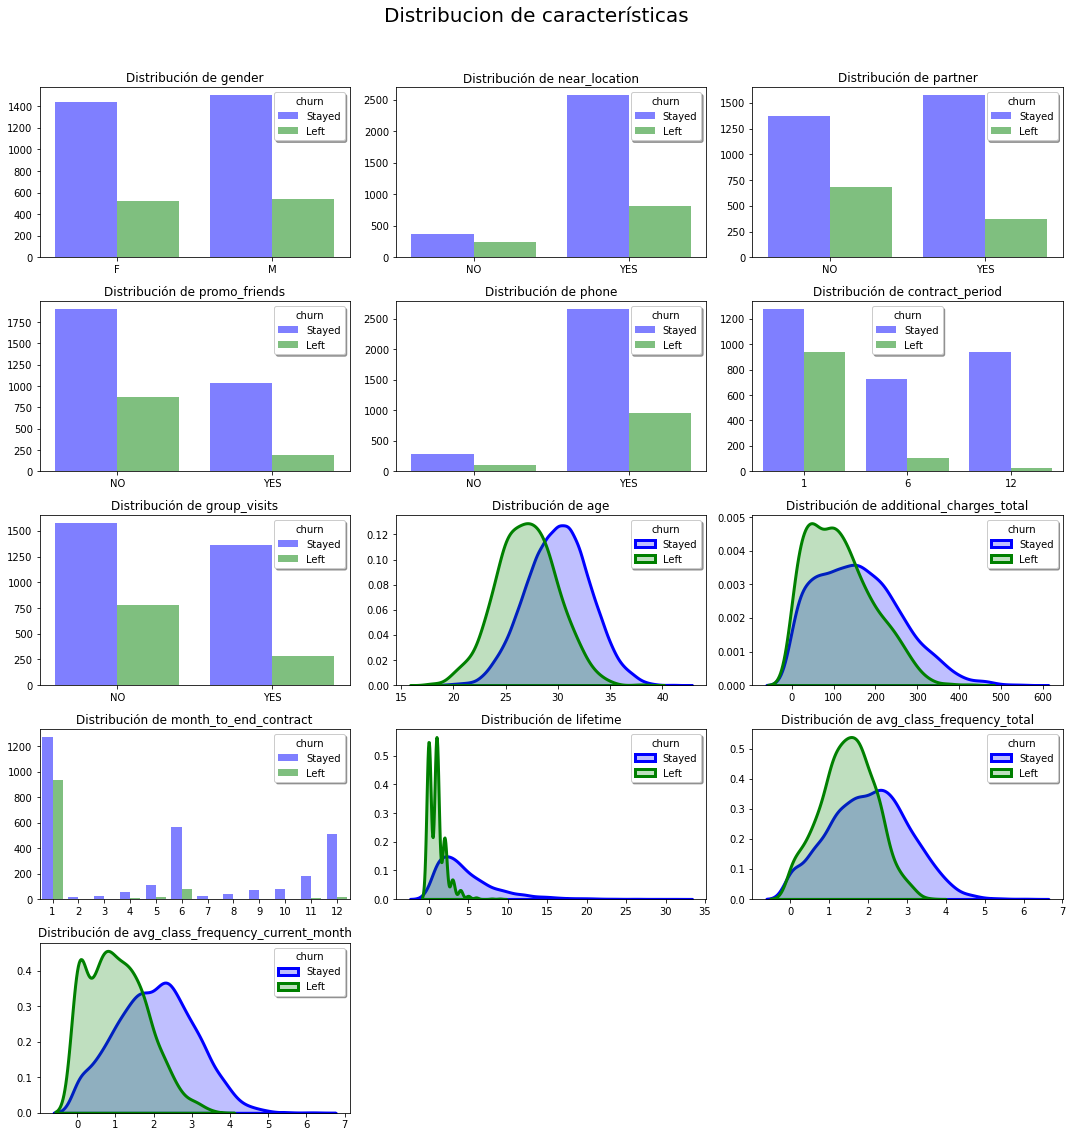

In [11]:
plot_dist(df,'churn',['Stayed', 'Left'])

Los graficos nos proporcionan una visualización clara de las diferencias entre los usuarios que cancelaron y los que no en función de las características, además confirman datos detectados observados en los datos medios:

*  Edad (age): Los usuarios que se quedan tienden a ser un poco mayores que los que cancelan.
*  Gasto adicionales (additional_charges_total): Los usuarios que gastan más en servicios adicionales son menos propensos a cancelar.
*  Tiempo de vida(lifetime): Los usuarios que han estado en el gimnasio durante más tiempo son menos propensos a cancelar.
*  Frecuencia de visitas (total): Los usuarios que visitan el gimnasio con más frecuencia a lo largo de su membresía son menos propensos a cancelar.
*  Frecuencia de visitas: Los usuarios que visitan el gimnasio con más frecuencia son menos propensos a cancelar.
*  La mayoría de usuarios facilitan el número de teléfono, y el contrato es más largo para los que se quedan.

## Matriz de correlación

Evaluemos la correlación entre las caracteristicas.

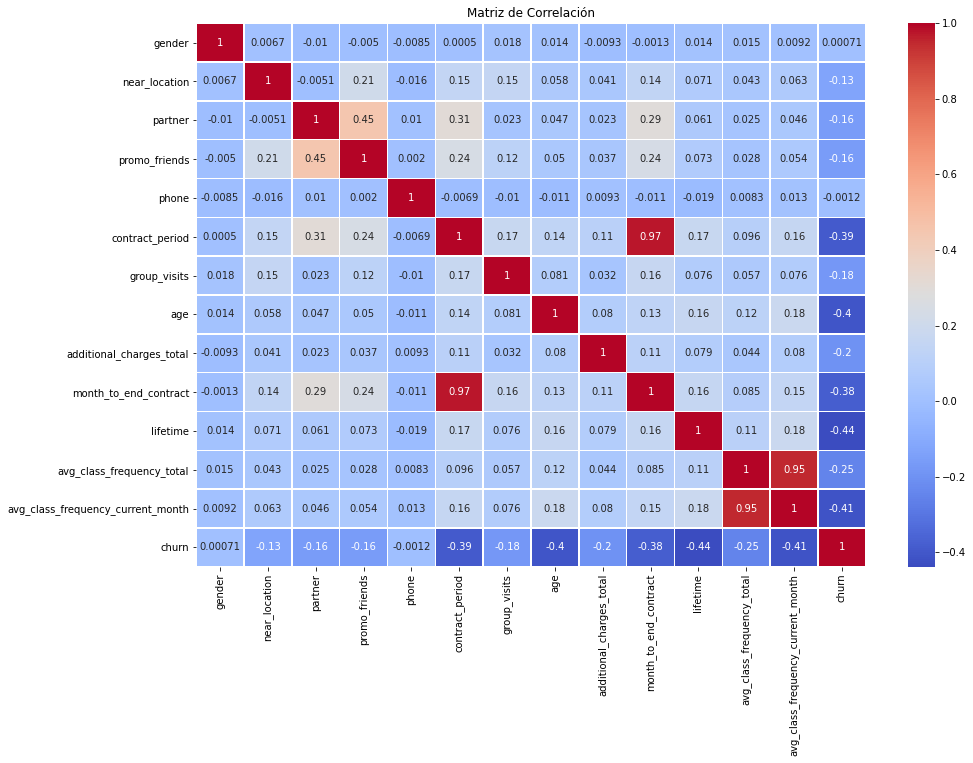

In [12]:
# Graficar la matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

Tenemos 2 pares de características fuertemente correlacionadas:
 * avg_class_frequency_total - avg_class_frequency_current_month: muestran una correlación bastante alta (0.95). Esto indica que la frecuencia con la que un cliente visita el gimnasio en general está estrechamente relacionada con la frecuencia de sus visitas en el último mes.
 *  contract_period - month_to_end_contract :tienen una correlación muy alta (0.97). Esto tiene sentido ya que cuanto más largo es el período del contrato, más meses quedan hasta el final del contrato, en general.

 Ademas podemos ver que Churn tiene correlaciones negativas moderadas con características como age, contract_period, month_to_end_contract, lifetime, y las frecuencias de visita. Esto respalda nuestras observaciones anteriores de que estos factores juegan un papel en la retención del cliente.

Decidimos no eliminar las caracteristicas fuertemente correlacionadas para no intercambiar exactitud por tener un conjunto de datos menor para usar Regresión logística posteriormente.

En el paso 2, examinamos las características: valores ausentes, su valor medio y desviación estándar, y su distribución entre los grupos de los que se quedaron y los que abandonaron el gimnasio. Observamos los gráficos de distribución de estos dos grupos y creamos un mapa de resultados para identificar las características fuertemente correlacionadas.

Con esta información en mente, podemos avanzar al siguiente paso: construir un modelo para predecir la cancelación de usuarios.

# Construir un modelo para predecir la cancelación de usuarios

Crearemos un modelo de clasificación binaria para clientes donde la característica objetivo es la marcha del usuario el mes siguiente. En primer lugar, aquí vamos a resolver una tarea de clasificación binaria (queremos predecir si el usuario se quedará o se irá, 0 o 1), por lo que comenzaremos con un modelo de Regresión Logística simple y adicional comprobar lado a lado un algoritmo más potente, por lo que utilizaremos RandomForest.

## Dividir los datos en conjuntos de entrenamiento y validación.

Dividimos el conjunto de datos que teníamos en datos de entrenamiento y de validación (prueba) con una proporción de 80/20.

In [13]:
# Dividir el dataset en características y variable objetivo
X = df.drop('churn', axis=1)
y = df['churn']

# Dividir en conjuntos de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Entrenar el modelo en el set de entrenamiento

Entrenaremos los modelos previamente seleccionados pero antes implementaremos una grilla de optimización de hiperparámetros para optimizar el comportamiento de cada uno.

### Entrenando el modelo de regresión logísitca

In [14]:
# Definir la grilla de hiperparámetros para LogisticRegression
lr_param_grid = {
    'C': np.logspace(-3, 3, 7),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Inicializar el modelo LogisticRegression
lr = LogisticRegression(random_state=0)

# Configurar la búsqueda con GridSearchCV
lr_grid_search = GridSearchCV(estimator=lr, param_grid=lr_param_grid, 
                              cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Entrenar el modelo con GridSearchCV para encontrar los mejores hiperparámetros
lr_grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
lr_best_params = lr_grid_search.best_params_
lr_best_params

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...............C=0.01, penalty=l2, solv

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [15]:
#Entrenando el modelo con el metodo de Regresión Logística
lr_model = LogisticRegression(
    C=lr_best_params['C'],
    penalty=lr_best_params['penalty'],
    solver=lr_best_params['solver'],
    random_state=0
)

lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_probabilities = lr_model.predict_proba(X_test)[:,1]

### Entrenando el modelo de random forest

In [16]:
# Definir la grilla de hiperparámetros para random forest
rf_param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar el modelo RandomForest
rf = RandomForestClassifier(random_state=0)

# Configurar la búsqueda con GridSearchCV
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Entrenar el modelo con GridSearchCV para encontrar los mejores hiperparámetros
rf_grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
rf_best_params = rf_grid_search.best_params_
rf_best_params

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END max_

[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimato

[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total tim

[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.5s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.5s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=   0.5s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50; t

[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.5s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 

[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   0.5s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time= 

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 150}

In [17]:
#Entrenando el modelo con el metodo de bosque aleatorio
rf_model = RandomForestClassifier(
    n_estimators=rf_best_params['n_estimators'],
    max_depth=rf_best_params['max_depth'],
    min_samples_split=rf_best_params['min_samples_split'],
    min_samples_leaf=rf_best_params['min_samples_leaf'],
    random_state=0
)

rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:,1]

In [18]:
models = {'LogisticRegression' : lr_model, 'RandomForestClassifier' : rf_model}

## Comparar modelos

Evaluaremos la exactitud, la precisión y el Recall de los modelos utilizando los datos de validación.

* **Exactitud**: Esta es la proporción de predicciones exactas entre todas las predicciones. Cuanto más cerca estemos del 100% de exactitud, mejor. **(TP+TN)/(TP+FP+TN+FN)**
* **Precisión**: la proporción de respuestas correctas solo en la clase objetivo **TP/(TP+FP)**
* **Recall**: capacidad del clasificador para encontrar todas las muestras positivas **TP/(TP+FN)**

Dado que el objetivo es retener a los clientes y evitar que abandonen el gimnasio, Recall podría ser la métrica más importante en este caso. Es esencial identificar a la mayoría de los clientes que están en riesgo de abandonar para poder tomar medidas para retenerlos. Sin embargo, si las acciones de retención son costosas, también querrías considerar la Precisión para asegurarte de que las acciones de retención se dirigen principalmente a los clientes que realmente están en riesgo.


In [19]:
def calculate_metrics(model, X_test, y_test):
    return [round(accuracy_score(y_test,model.predict(X_test)),2),
            round(precision_score(y_test,model.predict(X_test)),2),
            round(recall_score(y_test,model.predict(X_test)),2)]

In [20]:
metricsn= ['Exactitud','Precisión','Recall']
metrics = pd.DataFrame(index = metricsn)

for name, model in models.items():
    metrics[name] = calculate_metrics(model, X_test, y_test)
metrics

,LogisticRegression,RandomForestClassifier
Exactitud,0.92,0.92
Precisión,0.86,0.84
Recall,0.83,0.83


La regresión logística tiene resultados levemente mejores que Random Forest para Precisión y se igualan en Recall, que son nuestras metricas prioritarias. Evaluaremos si usar un umbral custom mejora nuestras metricas.

In [21]:
# establecemos el umbral
threshold = .5
# calculamos la predicción sobre la base de las probabilidades y la relación entre las clases
lr_custom_predictions = [0 if i<threshold else 1 for i in lr_probabilities]
rf_custom_predictions = [0 if i<threshold else 1 for i in rf_probabilities]

In [22]:
# imprimimos todas las métricas para la predicción con un nuevo umbral
print('Métricas para la predicción con umbral personalizado con regresión logistica')
print('Exactitud custom: {:.2f}'.format(accuracy_score(y_test,lr_custom_predictions)))
print('Precisión custom: {:.2f}'.format(precision_score(y_test,lr_custom_predictions)))
print('Recall custom: {:.2f}'.format(recall_score(y_test,lr_custom_predictions)))
print('\nMétricas para la predicción con umbral personalizado con random forest')
print('Exactitud custom: {:.2f}'.format(accuracy_score(y_test,rf_custom_predictions)))
print('Precisión custom: {:.2f}'.format(precision_score(y_test,rf_custom_predictions)))
print('Recall custom {:.2f}'.format(recall_score(y_test,rf_custom_predictions)))

Métricas para la predicción con umbral personalizado con regresión logistica
Exactitud custom: 0.93
Precisión custom: 0.86
Recall custom: 0.83

Métricas para la predicción con umbral personalizado con random forest
Exactitud custom: 0.92
Precisión custom: 0.84
Recall custom 0.83


Se experimento variando los umbrales y con el umbral 0.5 mejoramos 0.1% en exactitud pero no tuvieron un impacto significativo en nuestras metricas prioritarias. El resto de umbrales aumentaba mucho unas metricas pero caía considerablemente otras, por lo que la aplicación del modelo de Regresión logistica sin umbral sigue siendo la opcion más balanceada centrandonos en Precisión y Recall.

# Crear clústeres de usuarios

Evaluemos ver en qué grupos se pueden dividir los usuarios. El primer paso es la estandarización de datos.

## Estandarizar los datos.

In [23]:
scaler = StandardScaler()
X_sc = scaler.fit_transform(df.drop('churn', axis=1))

## Matriz de distancias y dendrograma.

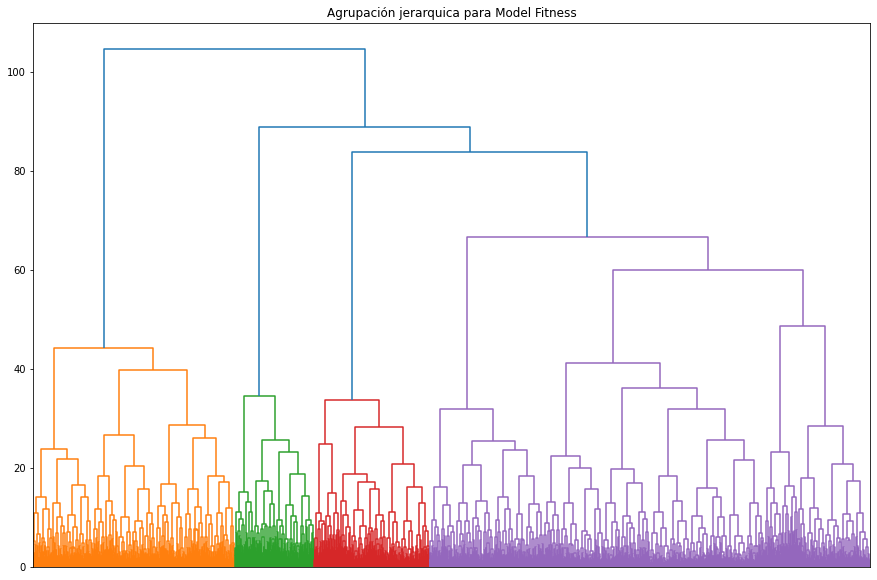

Tomó 7 segundos crear este dendrograma.


In [24]:
# Crear una matriz de distancias basada en las características estandarizadas
linked = linkage(X_sc, method = 'ward')

start = time.time()

# Trazar el dendrograma
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top', truncate_mode = 'level')
plt.title('Agrupación jerarquica para Model Fitness')
plt.xticks([]) 
plt.show()

end = time.time()

print('Tomó {} segundos crear este dendrograma.'.format(round(end - start)))

El número óptimo de clústeres sugerido corresponde a los cuatro colores diferentes del gráfico.

## Entrenamiento del modelo de clustering con el algoritmo K-means

Nuestros resultados sugieren que lo optimo es usar 4 clústeres pero en este caso para que sea más sencillo comparar los resultados con los de otros estudiantes usaremos 5.

In [25]:
# Definir el modelo K-means con 5 clusters
km = KMeans(n_clusters = 5, random_state=0,n_init=10 )
# Predecir los clusters para nuestros datos
labels = km.fit_predict(X_sc)

df['cluster'] = labels
print(df.groupby('cluster')['gender'].agg({lambda x: 100*x.count()/len(df),'count'}). \
      rename(columns={'<lambda_0>':'%','count':'Count'}))

              %  Count
cluster               
0        25.250   1010
1         9.625    385
2        12.625    505
3        31.550   1262
4        20.950    838


Hemos creado un modelo de 5 clusteres.

## Valores medios y distribución de características para clústeres

In [26]:
# Valores medios de las características por cluster
df.groupby('cluster').mean().iloc[:,0:9]

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,additional_charges_total
cluster,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905


In [27]:
df.groupby('cluster').mean().iloc[:,9:]

,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,
0,9.954455,4.736634,1.982055,1.974789,0.027723
1,4.475325,3.924675,1.847220,1.716369,0.267532
2,2.198020,2.809901,1.660461,1.477324,0.443564
3,1.856577,2.440571,1.247634,1.012983,0.514263
4,2.459427,4.898568,2.852002,2.850161,0.068019


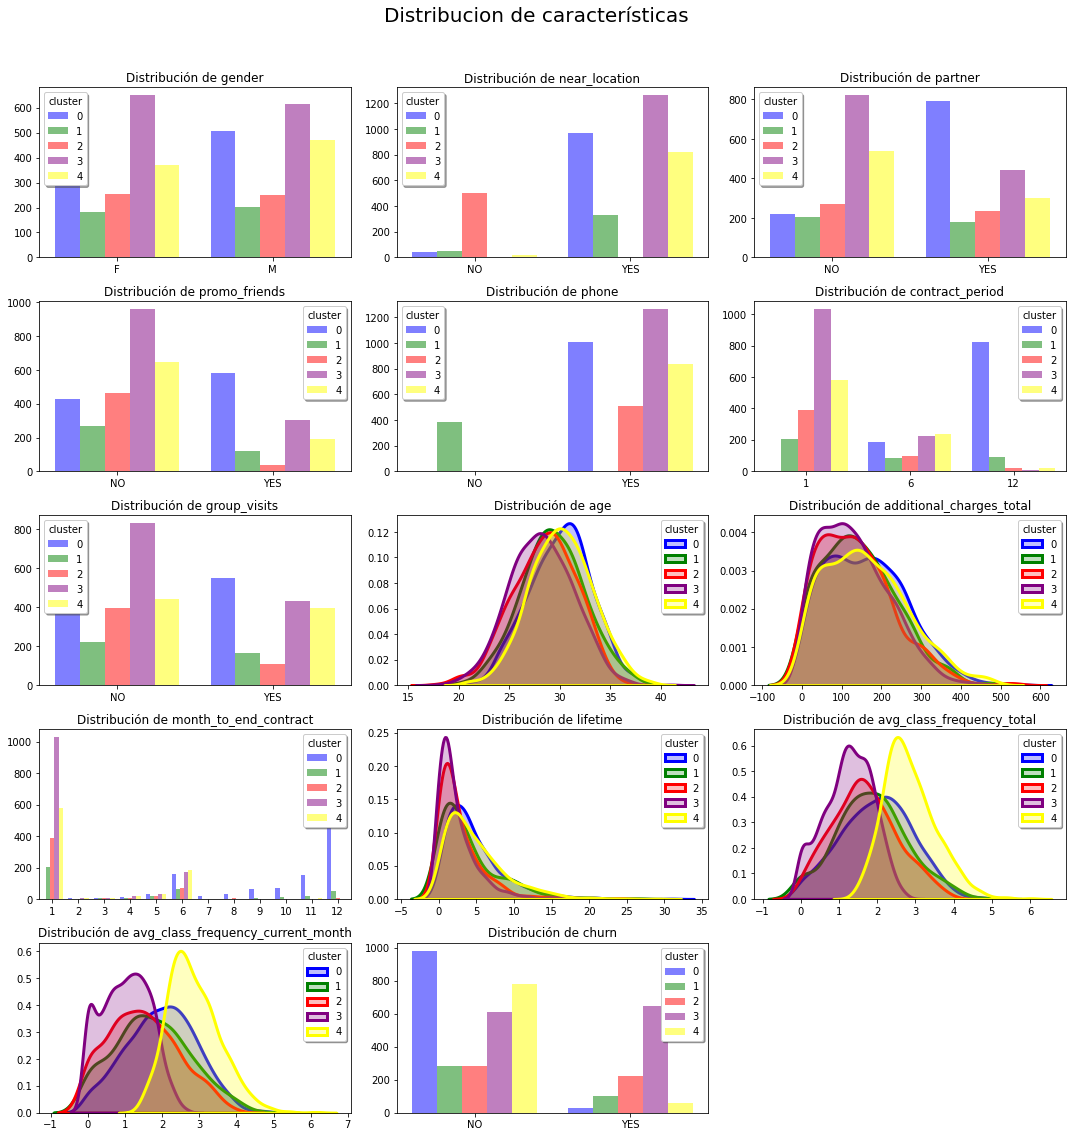

In [28]:
#distribuciones de características para los clústeres
plot_dist(df,'cluster')

* Solo el cluster 2 se caracteriza por vivir lejos de el gimnacio.
* LA mayoría de los usuarios del cluster 0 son trabajadores de empresas asociadas.
* Los usuarios del cluster 1 no suelen dar su número telefonico.
* Los cluster 0 y 4 son los que suelen hacer más compras en otros servicios del gimnacio.
* Los usuarios del cluster 0 y 4 son los que menos cancelan, por otro lado los del cluster 2 y 3 suelen cancelar seguido.
* Los usuarios del cluster 1 son los que tienden a contrarar por los periodos más largos.
* La mayoría de los usuarios del cluster 3 tienen su contrato por expirar.
* Los usuarios del cluster 4 son los que realizan más visitas mensuales y en total.

## Tasa de cancelación

In [29]:
df.pivot_table(index='cluster',values='churn',
              aggfunc=['count',
                      'sum',
                       lambda x: round(((x == 0).sum() / x.count() - 1) * 100, 2)]).rename(
                       columns={'count':'Total usuarios', 'churn':'', 'sum':'Se fueron', '<lambda>':'Tasa de cancelación'}).reset_index()

,cluster,Total usuarios,Se fueron,Tasa de cancelación
,,,,
0,0,1010,28,-2.77
1,1,385,103,-26.75
2,2,505,224,-44.36
3,3,1262,649,-51.43
4,4,838,57,-6.80


Los grupos más propensos a irse son el cluster 2 y 3 con un 44.4% y 51.4% correspondientemente.

**Clusteres resultantes:**

  Clúster 0:

* Tiene una alta proporción de clientes cerca de la ubicación del gimnacio (95.9%).
* La mayoría de estos clientes son trabajadores de empresas asociadas (78.3%).
* Más de la mitad se inscribieron a través de la promoción "trae a un amigo" (57.4%).
* Todos proporcionaron su número de teléfono.
* Tienen contratos largos, con un promedio de casi 11 meses.
* En promedio, han estado con el gimnasio durante casi 5 meses.
* La tasa de abandono es extremadamente baja (2.7%).


  Clúster 1:

* La mayoría de los clientes están cerca de la ubicación (86.2%).
* Menos de la mitad son trabajadores de empresas asociadas y solo el 30.6% se unió a través de la promoción "trae a un amigo".
* Ninguno proporcionó su número de teléfono.
* Los contratos son más cortos en comparación con el clúster 0, con un promedio de 4.8 meses.
* Han estado con el gimnasio durante casi 4 meses en promedio.
* La tasa de abandono es más alta que el clúster 0 pero todavía es baja (26.7%).

  
  Clúster 2:

* Ninguno de los clientes está cerca de la ubicación.
* Menos de la mitad son trabajadores de empresas asociadas y solo el 7.9% se unió a través de la promoción "trae a un amigo".
* Todos proporcionaron su número de teléfono.
* Los contratos son aún más cortos, con un promedio de 2.35 meses.
* Han estado con el gimnasio por poco menos de 3 meses en promedio.
* La tasa de abandono es bastante alta (44.4%).


  Clúster 3:

* Todos los clientes están cerca de la ubicación.
* Solo el 35% son trabajadores de empresas asociadas y el 24% se unió a través de la promoción "trae a un amigo".
* Todos proporcionaron su número de teléfono.
* Tienen los contratos más cortos, con un promedio de 1.95 meses.
* Han estado con el gimnasio por poco más de 2.4 meses en promedio.
* La tasa de abandono es la más alta de todos los clústeres (51.4%).


  Clúster 4:

* Casi todos los clientes están cerca de la ubicación (97.6%).
* Solo el 35.7% son trabajadores de empresas asociadas, pero el 23% se unió a través de la promoción "trae a un amigo".
* Casi todos proporcionaron su número de teléfono.
* Los contratos tienen una duración promedio de 2.67 meses.
* Han estado con el gimnasio por casi 5 meses en promedio, similar al clúster 0.
* La tasa de abandono es extremadamente baja (6.8%), similar al clúster 0.


En el paso 4 se construyó una matriz de distancias y con su ayuda se dibujó un dendrograma que ayudó a determinar el número de clusters en los que debíamos dividir a los usuarios de la cadena de gimnasios. Después de que se formaron clusters, se analizó el valor medio de las características y su distribución. La última tarea fue calcular la tasa de cancelación para cada clúster, resultando en 5 grupos que destacan en las siguientes caracteristicas:

- El Clúster 0 y el Clúster 4 tienen las tasas de abandono más bajas y son los más leales.
- El Clúster 3 tiene la tasa de abandono más alta y es el más riesgoso.
- El Clúster 1 y Clúster 2 tienen tasas de abandono intermedias.

# Conclusiones y recomendaciones básicas sobre trabajar con clientes

En base al proceso realizado con los datos de Model Fitness podemos decir:

1. Sobre factores de retención:
  - Estar cerca del gimnasio aumenta la retención de clientes.
  - Las asociaciones corporativas (empleados de empresas asociadas) y las promociones de "trae a un amigo" son eficaces para retener clientes.
  - Los usuarios que gastan más en servicios adicionales y visitan el gimnasio con más frecuencia son menos propensos a cancelar.

2. Recomendaciones de marketing:
  - Es esencial segmentar a los clientes para entender sus comportamientos y necesidades específicas según los descubrimientos realizados. Una estrategia única para todos los clientes no sería efectiva.
  - Es necesario crear una estrategia de marketing y retención para atraer y mantener usuarios con perfiles similares a los del cluster 0 y 4.
  - El clúster 3 tiene una alta tasa de cancelación. Se deben ofrecer incentivos especiales o programas de fidelización para este grupo.
  - Ampliar las promociones como "trae a un amigo" y buscar más asociaciones corporativas para aumentar la retención de clientes.
  - Implementar programas de fidelización que recompensen a los usuarios por su frecuencia de visita y gastos en servicios adicionales.
  - La ubicación del gimnasio juega un papel crucial. Para futuras expansiones, es esencial considerar abrir gimnasios en ubicaciones estratégicas donde hay una alta densidad de público objetivo.